<a href="https://colab.research.google.com/github/OlyaMizonova/Labs-in-colab/blob/main/2_%D0%BB%D0%B0%D0%B1%D0%BE%D1%80%D0%B0%D1%82%D0%BE%D1%80%D0%BD%D0%B0%D1%8F_%D0%BF%D0%BE_%D1%81%D0%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Нелинеаризованная система:
$$
\left \lbrace
\begin{matrix}
\ddot{\phi}sin^2(\theta)+\dot{\phi}\dot{\theta}sin(2\theta)=0 \\
\ddot{\theta}+\frac{g}{l}sin(\theta)-\frac{1}{2}\dot{\phi}^2sin(2\theta)=0
\end{matrix}
\right.
$$
Линеаризованная система:
$$\ddot{\theta}+\frac{g}{l}\theta=0$$
Система с режимом биений:
$$
\left \lbrace
\begin{matrix}
\ddot{\phi}sin^2(\theta)+\dot{\phi}\dot{\theta}sin(2\theta)=0 \\
\ddot{\theta}+\frac{g}{l}sin(\theta)-\frac{1}{2}\dot{\phi}^2sin(2\theta)=Bcos(\omega_{внеш}t)
\end{matrix}
\right.
$$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from numpy.linalg import eig

In [ ]:
g=9.81
def nonLinear(l):
  def rhs(t,X):
    phi,x, theta,  y = X
    res = [x,-2*(1/(np.tan(theta)+1e-12))*x*y, y,x**2*np.sin(2*theta)/2-g/l*np.sin(theta)]
    return res
  return rhs

In [ ]:
def Linear(l):
  def rhs(t,X):
    phi,x, theta,  y = X
    g=9.81
    return [x, 0, y,-g/l*theta]
  return rhs

In [ ]:
def normal_mode(A):
    try:
        eiпVal, eigVec = np.linalg.eig(A)
    except np.linalg.LinAlgError:
        print("Нет нормальных колебаний")
        return False

    initial_conditions = []
    for i in eigVec.T:
        initial_conditions.append(np.real(i))

    return initial_conditions
l=1
A = np.array([[0, 0, 0, 1],
              [0, 0, 0, 0],
              [0, 1, 0, 0],
              [-g/l, 0, 0, 0],])
y0s = normal_mode(A)
y0s = y0s[:-2]
print(y0s)

[array([0.       , 0.       , 0.       , 0.9526243]), array([0.       , 0.       , 0.       , 0.9526243])]


In [ ]:
#y0=y0s[0]
y0=[1,1,1,2]
sol = solve_ivp(nonLinear(1),[0,5],y0, method='RK45', rtol=1e-10)
phi, x, theta, y = sol.y
tim = sol.t
sol1 = solve_ivp(Linear(1),[0,5],y0, method='RK45', rtol=1e-10)
phi1, x1, theta1, y1 = sol1.y
tim1 = sol1.t
phi%=np.pi*2
phi1%=np.pi*2

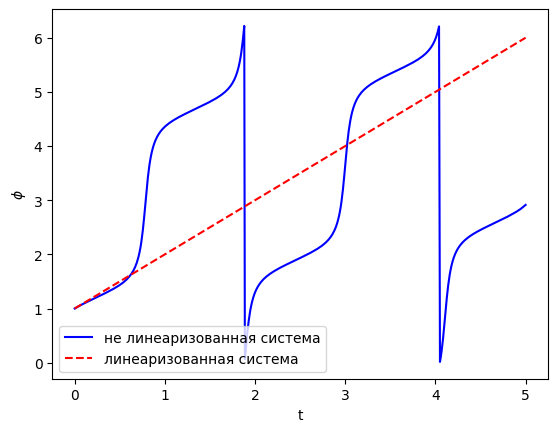

In [ ]:
plt.plot(tim,phi, color='blue', label = "не линеаризованная система")
plt.plot(tim1,phi1, color='red', linestyle='--', label = "линеаризованная система")
plt.xlabel('t')
plt.ylabel(r'$\phi$')
plt.legend()

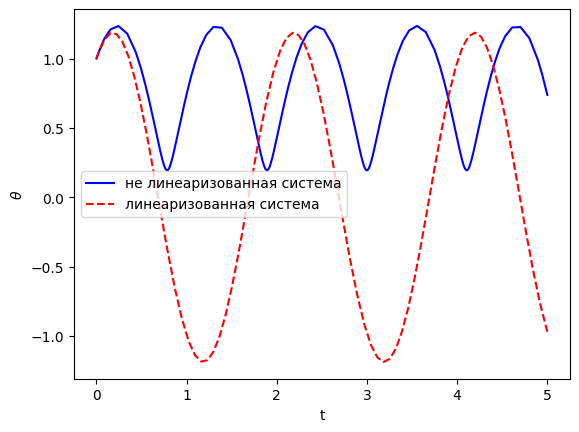

In [ ]:
plt.plot(tim,theta, color='blue',label = "не линеаризованная система")
plt.plot(tim1,theta1, color='red', linestyle='--', label = "линеаризованная система")
plt.xlabel('t')
plt.ylabel(r'$\theta$')
plt.legend()

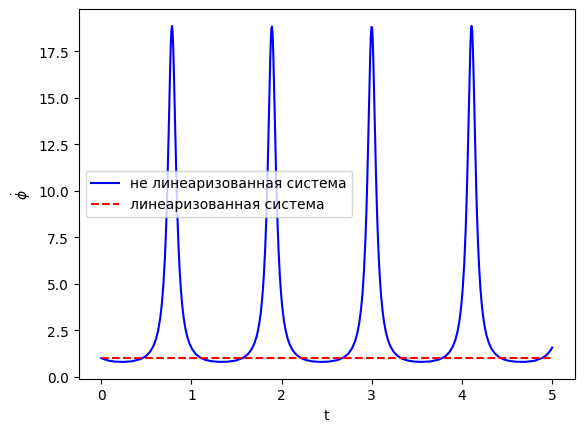

In [ ]:
plt.plot(tim,x, color='blue',label = "не линеаризованная система")
plt.plot(tim1,x1, color='red', linestyle='--', label = "линеаризованная система")
plt.xlabel('t')
plt.ylabel(r'$\dot{\phi}$')
plt.legend()

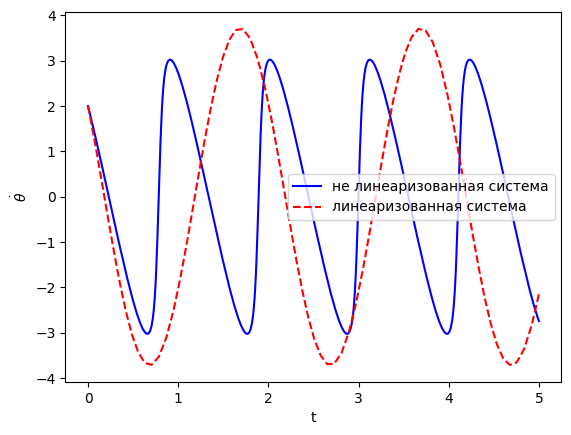

In [ ]:
plt.plot(tim,y, color='blue',label = "не линеаризованная система")
plt.plot(tim1,y1, color='red', linestyle='--', label = "линеаризованная система")
plt.xlabel('t')
plt.ylabel(r'$\dot{\theta}$')
plt.legend()